In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Import dataset
musc_df = pd.read_csv("Cleaned_Music_Dataset.csv")
musc_df.head()

,Tempo (BPM),Spectral Centroid (Hz),MFCC1,Chroma,Loudness (dB),Spectral Bandwidth (Hz),Genre,Tempo*Centroid,Tempo^2,Unknown Measure
0,143,2438.233095,-19.304930,F Major,-10.790311,1367.269378,Hip-Hop,351105.565645,20736,115.2
1,147,3859.667710,29.878508,D Minor,-8.758926,1743.684275,Hip-Hop,586669.491867,23104,121.6
2,106,2997.642139,49.616509,A Minor,-23.138455,1293.743312,Hip-Hop,332738.277483,12321,88.8
3,124,2970.982600,-39.850994,A Major,-10.509433,1082.924793,Hip-Hop,365430.859808,15129,98.4
4,116,2756.660017,12.314632,B Minor,-5.763737,2331.115735,Hip-Hop,325285.882012,13924,94.4


In [105]:
# Checking for null values
print("Null values:")
print(musc_df.isnull().sum())

Null values:
Tempo (BPM)                0
Spectral Centroid (Hz)     0
MFCC1                      0
Chroma                     1
Loudness (dB)              0
Spectral Bandwidth (Hz)    1
Genre                      0
Tempo*Centroid             0
Tempo^2                    0
Unknown Measure            0
dtype: int64


In [106]:
# Description of numberical columns
musc_df.describe()

,Tempo (BPM),Spectral Centroid (Hz),MFCC1,Loudness (dB),Spectral Bandwidth (Hz),Tempo*Centroid,Tempo^2,Unknown Measure
count,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000
mean,130.205000,3008.811942,0.759714,-17.607395,1677.492541,391550.709665,17260.828000,104.172800
std,17.460293,557.413132,29.192150,7.125087,492.397448,89130.141355,4542.394517,13.969711
min,100.000000,2002.003986,-49.922768,-29.936016,801.017463,201097.273310,10000.000000,80.000000
25%,116.000000,2541.081883,-25.379989,-23.846676,1269.333299,324717.377668,13456.000000,92.800000
50%,131.000000,3032.170918,1.580184,-17.872326,1679.635824,386883.101732,17161.000000,104.800000
75%,146.000000,3444.698852,25.413601,-11.306829,2100.100828,453761.264355,21316.000000,116.800000
max,159.000000,3999.331471,49.987273,-4.801267,2499.942800,626479.206149,25281.000000,127.200000


In [107]:
musc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tempo (BPM)              1000 non-null   int64  
 1   Spectral Centroid (Hz)   1000 non-null   float64
 2   MFCC1                    1000 non-null   float64
 3   Chroma                   999 non-null    object 
 4   Loudness (dB)            1000 non-null   float64
 5   Spectral Bandwidth (Hz)  999 non-null    float64
 6   Genre                    1000 non-null   object 
 7   Tempo*Centroid           1000 non-null   float64
 8   Tempo^2                  1000 non-null   int64  
 9   Unknown Measure          1000 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 78.3+ KB


In [108]:
# Values in the categorical columns
print(f"Genres: {musc_df["Genre"].unique()}")
print(f"Keys: {musc_df["Chroma (Key + Mode)"].unique()}")

musc_df.columns = musc_df.columns.str.strip()

Genres: ['Hip-Hop' 'Country' 'Pop' 'Blues' 'Classical' 'Electronic' 'Metal' 'Jazz'
 'Rock' 'Reggae']


KeyError: 'Chroma (Key + Mode)'

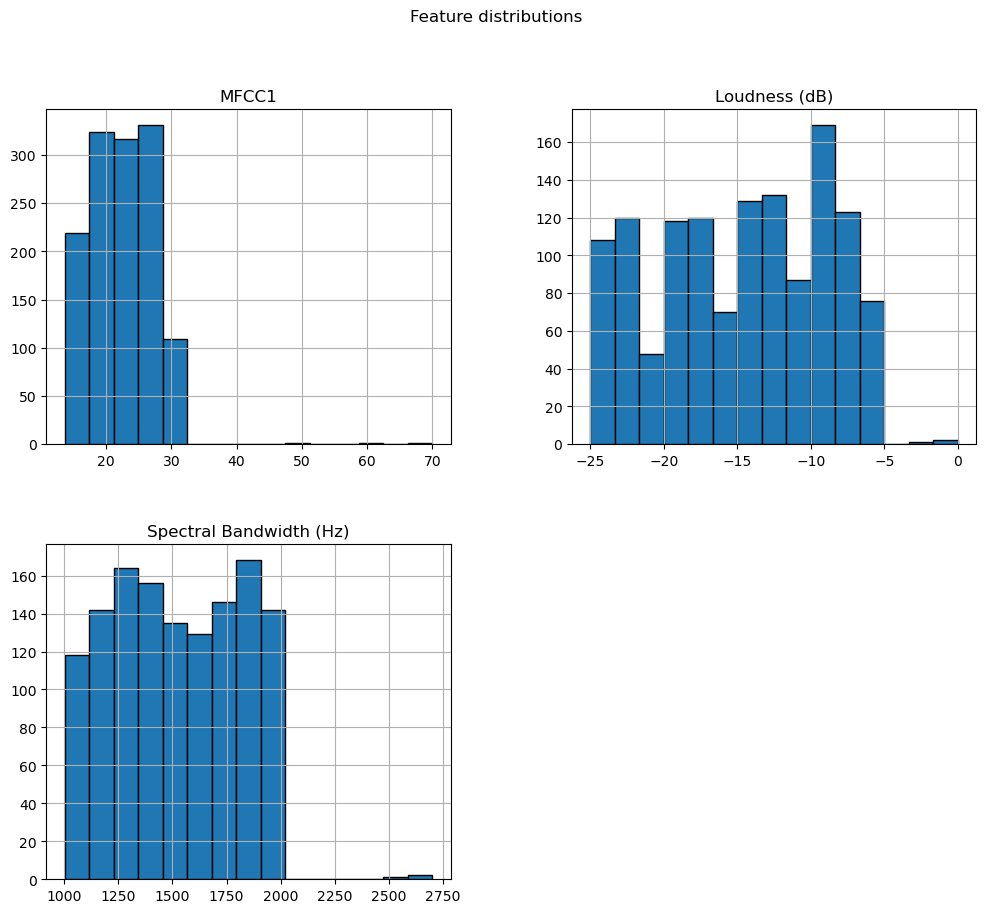

In [ ]:
considered = ["MFCC1", "Loudness (dB)", "Spectral Bandwidth (Hz)"] #, "Tempo * Centroid", "Tempo^2", "Unknown Measure"]
musc_df[considered].hist(figsize= (12,10), bins= 15, edgecolor= "black")
plt.suptitle("Feature distributions")
plt.show()

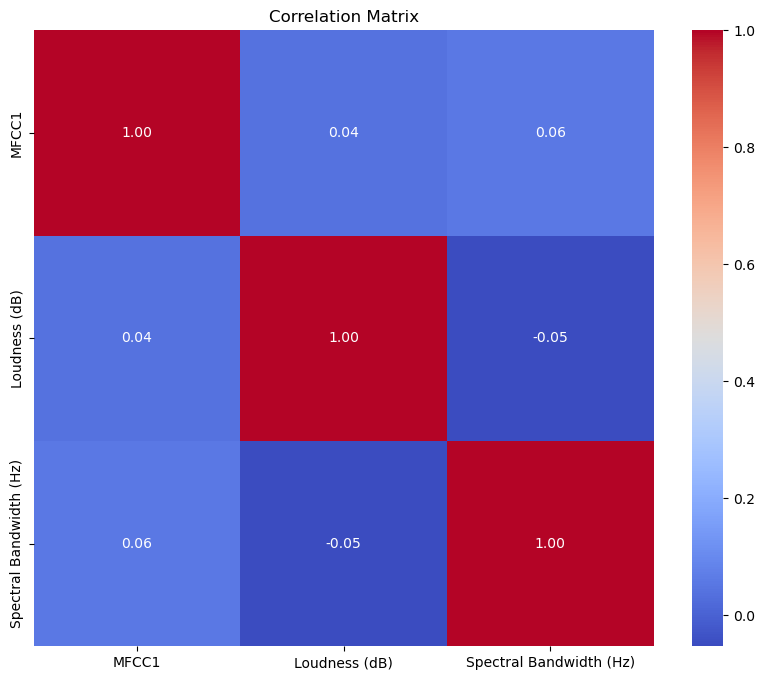

In [67]:
corr_mat = musc_df[considered].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_mat, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [69]:
data = musc_df.dropna(subset = ["Tempo (BPM)", "Highly Correlated"])

mod = LinearRegression()

mod.fit(data[["Tempo (BPM)"]], data["Highly Correlated"])

slope = mod.coef_[0]
intercept = mod.intercept_

print(f"Estimated formula: y = {slope:.3f}x + {intercept:.3f}")

Estimated formula: y = 0.800x + 0.013


In [74]:
# Calculating Tempo from Unknown measure
#musc_df.loc[musc_df["Tempo (BPM)"].isnull(), "Tempo (BPM)"] = (musc_df["Highly Correlated"] - 0.036) / 0.8

In [75]:
# Filling empty Tempo values from Tempo^2 column
musc_df.loc[musc_df["Tempo (BPM)"].isnull(), "Tempo (BPM)"] = np.sqrt(musc_df["Tempo^2"])

In [ ]:
# Filling empty Tempo^2 values from Tempo column
musc_df.loc[musc_df["Tempo^2"].isnull(), "Tempo^2"] = np.square(musc_df["Tempo (BPM)"])

In [76]:
# Filling emplty pectral centroid values
musc_df.loc[musc_df["Spectral Centroid (Hz)"].isnull(), "Spectral Centroid (Hz)"] = musc_df['Tempo * Centroid'] / musc_df['Tempo (BPM)']

In [77]:
# Checking for outliers
z = np.abs(stats.zscore(musc_df[["MFCC1", "Loudness (dB)", "Spectral Bandwidth (Hz)", "Tempo (BPM)"]]))
outls = musc_df[z > 3]
print(outls.count())

Tempo (BPM)                3
Spectral Centroid (Hz)     0
MFCC1                      3
Chroma (Key + Mode)        0
Loudness (dB)              0
Spectral Bandwidth (Hz)    3
Genre                      0
Tempo * Centroid           0
Tempo^2                    0
Highly Correlated          0
dtype: int64


In [359]:
musc_df = musc_df.dropna(subset = ["Spectral Centroid (Hz)"])

In [78]:
# Checking for null values again
print("Null values:")
print(musc_df.isnull().sum())

Null values:
Tempo (BPM)                0
Spectral Centroid (Hz)     0
MFCC1                      0
Chroma (Key + Mode)        0
Loudness (dB)              0
Spectral Bandwidth (Hz)    0
Genre                      0
Tempo * Centroid           0
Tempo^2                    0
Highly Correlated          0
dtype: int64


In [79]:
# Creating new features
musc_df["Tempo * Loudness"] = musc_df["Tempo (BPM)"] * musc_df["Loudness (dB)"]

In [80]:
musc_df["Centroid * Bandwidth"] = musc_df["Spectral Centroid (Hz)"] * musc_df["Spectral Bandwidth (Hz)"]

In [81]:
# One hot encoding of Keys
musc_df = pd.get_dummies(musc_df, columns=["Chroma (Key + Mode)"], drop_first=True)
musc_df = pd.get_dummies(musc_df, columns=["Genre"], drop_first=True)

In [82]:
# Collection of all the encoded columns
key = [col for col in musc_df.columns if "Chroma" in col]
genre = [col for col in musc_df.columns if "Genre" in col]


In [83]:
# Split of the independent variables and the dependent variables
X = musc_df[["MFCC1", "Loudness (dB)", "Spectral Bandwidth (Hz)", "Tempo * Centroid", "Tempo^2", "Highly Correlated", "Tempo * Loudness", "Centroid * Bandwidth", "Spectral Centroid (Hz)", "Tempo (BPM)"] + key] 
Y = musc_df[genre]

In [84]:
# Convert encoded data into one column again
Y = np.argmax(musc_df[genre].values, axis = 1)


In [85]:
# Train and test split
X_train, X_mid, Y_train, Y_mid = train_test_split(X, Y, test_size = 0.4, random_state = 963)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_mid, Y_mid, test_size = 0.5, random_state = 963)

In [86]:
# Normalisation using standardisation (using mean and standard deviation)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [87]:
# Testing Logistic Regression on the data
model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs', random_state = 963)
model.fit(X_train, Y_train)

LogisticRegression(C=0.1, random_state=963)

In [88]:
# Predicting X train and testing accuracy
Y_valid_pred = model.predict(X_valid)
acc_valid = accuracy_score(Y_valid, Y_valid_pred)
print(f"Accuracy: {acc_valid}")


Accuracy: 0.5210727969348659


In [89]:
Y_test_pred = model.predict(X_test)
acc_test = accuracy_score(Y_test, Y_test_pred)
print(f"Accuracy test Logistic regression: {acc_test}")

Accuracy test Logistic regression: 0.5325670498084292


In [92]:
# Testing SVM
model2 =  svm.SVC(C = 1.0, kernel = "rbf", gamma = "scale", probability = False, random_state = 963)
model2.fit(X_train, Y_train)

Y_valid_pred_svm = model2.predict(X_valid)
acc_valid_svm = accuracy_score(Y_valid, Y_valid_pred_svm)
print(f"Accuracy SVM: {acc_valid_svm}")

Accuracy SVM: 0.5823754789272031


In [93]:
Y_test_pred_svm = model2.predict(X_test)
acc_test_svm = accuracy_score(Y_test, Y_test_pred_svm)
print(f"Accuracy test SVM: {acc_test_svm}")

Accuracy test SVM: 0.6091954022988506


In [102]:
# Testing Random Forest
model3 = RandomForestClassifier(
    n_estimators = 500,               # More trees for better learning
    max_depth = 10,                   # Slight increase in tree depth
    min_samples_split = 3,            # Allow splits to capture finer patterns
    min_samples_leaf = 2,             # Prevent overfitting
    class_weight = 'balanced',         # Handle class imbalance
    random_state = 963
    )
model3.fit(X_train, Y_train)

Y_valid_pred_rf = model3.predict(X_valid)
acc_valid_rf = accuracy_score(Y_valid, Y_valid_pred_rf)
print(f"Accuracy Random Forest: {acc_valid_rf}")

Accuracy Random Forest: 0.7126436781609196


In [103]:
Y_test_pred_rf = model3.predict(X_test)
acc_test_rf = accuracy_score(Y_test, Y_test_pred_rf)
print(f"Accuracy test Random Forest: {acc_test_rf}")

Accuracy test Random Forest: 0.7701149425287356


In [98]:
from xgboost import XGBClassifier

model4 = XGBClassifier(
    n_estimators=300, 
    max_depth=10, 
    learning_rate=0.05, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=963
)

model4.fit(X_train, Y_train)

Y_valid_pred_xgb = model4.predict(X_valid)
acc_valid_xgb = accuracy_score(Y_valid, Y_valid_pred_xgb)
print(f"Accuracy validation XGBoost: {acc_valid_xgb}")

Y_test_pred_xgb = model4.predict(X_test)
acc_test_xgb = accuracy_score(Y_test, Y_test_pred_xgb)
print(f"Accuracy test XGBoost: {acc_test_xgb}")

Accuracy validation XGBoost: 0.7471264367816092
Accuracy test XGBoost: 0.789272030651341


Therefore the best model to use here is Random Forest Classifier or XGBClassifier. Further tests can inprove accuracy of prediction.